# SIT742: Modern Data Science 
**(2021 Assessment Task 02 - Data Analytics)**

---
- Please refer to the CloudDeakin for the detailed assessment requirements.
- Please submit to Clouddeakin before the due date.
- It is a group assignment, and please form a group and self-enrol into the CloudDeakin groups.
- Students with difficulty in meeting the deadline because of illness, etc. must apply for an assignment extension in CloudDeakin no later than *12:00pm on 21/05/2021 (Friday)*.


Prepared by **SIT742 Teaching Team**




# Part I - Web Log Data

## Overview

Hotel TULIP a five-star hotel located at Deakin University, and its CIO Dr Bear Guts has asked the Team-SIT742 team to analyse the weblogs files. Hence, Hotel TULIP would like you *Group-SIT742* (a hypothetical data analytics group with up to 3 data analysers) to analyse web log files and discover user accessing patterns of different web pages. 

In this part, you are required to use give dataset to finish some required analysis, with the exploreation data analytics skills as well as visuilization skill.


You will be required to complete the coding to answer the questions with a neat and clean format, and you must keep outputs for code. Your commenting and adherence to code standards will also be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/ 


**Note**: You are not restricted to the partial code provided, and you can write your own code to implement the required tasks. But you should provide sufficient comments.


## 1.Data ETL

### 1.1 Load Data

In [92]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import datetime
from scipy import stats
import matplotlib
from pandas import DataFrame
from ipywidgets import IntProgress
from IPython.display import display
from zipfile import ZipFile
from google.colab import drive
import fnmatch

In [91]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# import to dataframe
zipdata = "/content/drive/MyDrive/HTWebLog_p1.zip"
with ZipFile(zipdata, 'r') as zip:
    file_list = zip.namelist()
    log_files = fnmatch.filter(file_list, "*.log")
    data = [pd.read_csv(zip.open(file_name),  encoding='iso-8859-1', parse_dates=[0,1], index_col=False, comment='#', delimiter='\s+', skiprows=4, header=None, 
    names=['date','time','s_sitename','s_ip','cs_method','cs_uri_stem','cs_uri_query','s_port','cs_username',
             'c_ip','cs(User_Agent)','cs(Referer)','sc_status','sc_substatus','sc_win32_status'],) for file_name in log_files]

In [4]:
# Join all files and see the top 5 rows
df_ht = pd.concat(data)
df_ht.head(5)

,date,time,s_sitename,s_ip,cs_method,cs_uri_stem,cs_uri_query,s_port,cs_username,c_ip,cs(User_Agent),cs(Referer),sc_status,sc_substatus,sc_win32_status
0,2006-11-01,2021-05-22 00:00:08,W3SVC1,127.0.0.1,GET,/Default.aspx,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.google.com/search?sourceid=navclien...,200.0,0.0,0.0
1,2006-11-01,2021-05-22 00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,-,200.0,0.0,0.0
2,2006-11-01,2021-05-22 00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
3,2006-11-01,2021-05-22 00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,lang=en-us,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
4,2006-11-01,2021-05-22 00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_img.jpg,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0


In order to reduce the processing time, we will remove all missing values for data and only select 30% of total data for classification. 

**Code**: 
    1. Remove all NAs, for the columns, if the column is with 15% NAs, you need to remove that column. Then, for the rows, if there are any NAs in that row, you need to remove that row (requests)  
    2. select 30\% of the total data in to a new dataframe weblog_df.
    
    *Keep the outputs for code in your notebook.

**Report**:
    The number of requests in weblog\_df.


In [5]:
# change all NAs to a consistant NaN
df_ht.replace(to_replace =["-", "None", "NA"], value = np.nan, inplace= True)

In [6]:
# remove columns with more than 15% NAs
df_ht.loc[:, df_ht.isnull().mean() < .15]
df_ht= df_ht.loc[:, df_ht.isnull().mean() < .15]

In [7]:
#drop rows with NA values 
df_ht.dropna()
df_ht=df_ht.dropna()

In [8]:
# only 30% of total data are selected for classification
weblog_df = df_ht.sample(frac = 0.3, random_state=1)

#Your code to show the number of requests in weblog_df
weblog_df.shape

(2530394, 12)

### 1.2 Feature Selection

**Code**: 
    You are required to select *'cs_method'*,*'cs_ip'*,*'cs_uri_stem'*,*'cs(Referer)'* as input features  and 'sc_status' as class label into a new dataframe ml_df for following Machine Learning Tasks. 

*Keep the outputs for code in your notebook.

**Report**:
    1. Data Description of ml_df,  
    2. Print top 5 rows of ml_df.



In [9]:
#drop unnecessary columns
df2 = weblog_df.drop(['date','time','s_ip','s_sitename','s_port','sc_substatus','sc_win32_status'],axis = 1)


In [10]:
# retrieve the numpy array
array=df2.values
# split the columns into input and output variables
features=array[:, :-1]
label=array[:, -1]
# summarize the shape of the loaded data
print(features.shape, label.shape)

(2530394, 4) (2530394,)


In [11]:
#Create Dataframe
ml_df=pd.DataFrame(df2,columns=['cs_method','c_ip','cs_uri_stem','cs(User_Agent)','sc_status'])
ml_df.head(5)

,cs_method,c_ip,cs_uri_stem,cs(User_Agent),sc_status
32497,GET,125.28.188.32,/Tulip/common/images/bar_2.jpg,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200.0
58592,GET,210.131.225.123,/Tulip/home/en-us/images/home.swf,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200.0
115347,GET,221.127.137.14,/Tulip/common/zh-hk/images/sectionbanner_whats...,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,304.0
62597,GET,221.239.71.229,/Tulip/includes/js/CommonUtil.js,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,304.0
56418,GET,219.79.2.210,/Tulip/common/zh-hk/images/sidebanner_2.jpg,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,304.0


In [12]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2530394 entries, 32497 to 27273
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   cs_method       object 
 1   c_ip            object 
 2   cs_uri_stem     object 
 3   cs(User_Agent)  object 
 4   sc_status       float64
dtypes: float64(1), object(4)
memory usage: 115.8+ MB


## 2.Unsupervised Learning
 You are required to complete this part only using **sklearn**.


**Code**: 
    1. Perform unsupervised learning on ml_df with K Means, with a varying K from 2 to 10;
    2. Plot in the elbow plot. 
    
    *Keep the outputs for code in your notebook.

**Report**:
    1. Figure 'KMeans' in the elbow plot, with a varying K from 2 to 10.



In [13]:
!pip install -q sklearn

In [14]:
from sklearn import preprocessing
from sklearn.cluster import KMeans 

le_df = ml_df.apply(preprocessing.LabelEncoder().fit_transform)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
# normalization 
mms = MinMaxScaler()
mms.fit(le_df)
le_transformed = mms.transform(le_df)

In [17]:
#Perform unsupervised learning on ml_df with K Means, with a varying K from 2 to 10
distortions = []
K = range(2,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(le_transformed)
    distortions.append(kmeanModel.inertia_)

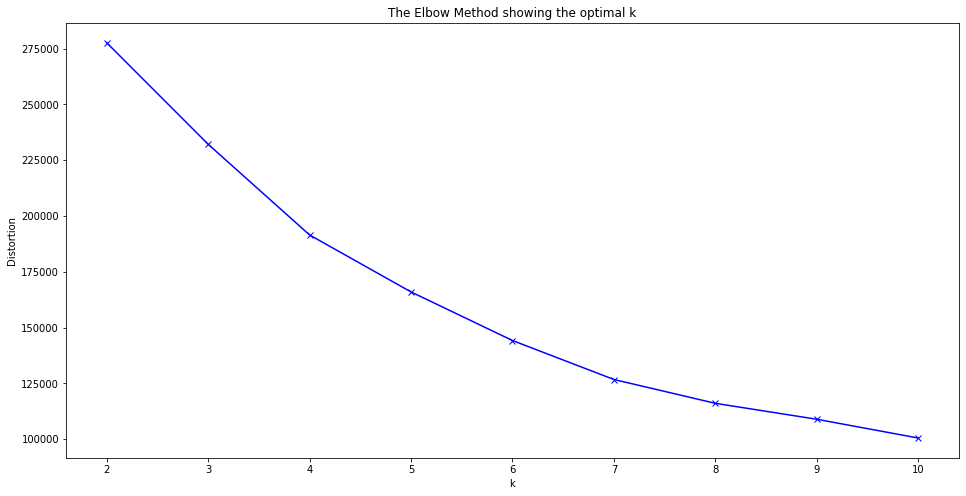

In [18]:
#Plot in the elbow plot.
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## 3.Supervised Learning
 You are required to complete this part only using **PySpark**.


In [19]:
# install Java8
! apt update

!lsb_release -a
!apt install default-jre
!apt install openjdk-8-jre-headless
!apt install openjdk-8-jdk openjdk-8-jre
!java -version
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# download spark 3.1.1
!wget -q http://apache.osuosl.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
# unzip it
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
# install findspark 
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

import findspark 
findspark.init() 


Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [60.5 kB]
Hit:12 http://ppa.launchpad.net/cran/

In [20]:
from pyspark.sql import SparkSession 
from pyspark.sql.types import *

spark = SparkSession.builder.appName('SIT742T2').getOrCreate()

### 3.1 Data Preparation 

In order to reduce the processing time, we will select 10% of le_df.

In [93]:
schema = StructType([StructField("sc_status", IntegerType(), True),
                     StructField("cs_method", IntegerType(), True),
                     StructField("c_ip", IntegerType(), True),
                     StructField("cs_uri_stem", IntegerType(), True),
                     StructField("cs(User_Agent)", IntegerType(), True)])

lr_df = spark.createDataFrame(le_df, schema)

In [94]:
#Only 10% of the data is used in this part.
lr_df = lr_df.sample(fraction=0.1, seed=1)


In [95]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
# transformer
vector_assembler = VectorAssembler(inputCols=['cs_method', 'c_ip', 'cs_uri_stem', 'cs(User_Agent)'],outputCol="features")
df_temp = vector_assembler.transform(lr_df )
df_temp.show(3)

+---------+---------+----+-----------+--------------+--------------------+
|sc_status|cs_method|c_ip|cs_uri_stem|cs(User_Agent)|            features|
+---------+---------+----+-----------+--------------+--------------------+
|        0|    53189|2644|       2249|             4|[53189.0,2644.0,2...|
|        0|    47602|2251|       1545|             4|[47602.0,2251.0,1...|
|        0|    47309|2286|       1545|             0|[47309.0,2286.0,1...|
+---------+---------+----+-----------+--------------+--------------------+
only showing top 3 rows



In [96]:
df_lr = df_temp.drop('cs_method', 'c_ip', 'cs_uri_stem', 'cs(User_Agent)')
df_lr.show(3)

+---------+--------------------+
|sc_status|            features|
+---------+--------------------+
|        0|[53189.0,2644.0,2...|
|        0|[47602.0,2251.0,1...|
|        0|[47309.0,2286.0,1...|
+---------+--------------------+
only showing top 3 rows



In [97]:
#change column name to lable
df_lr= df_lr.withColumnRenamed('sc_status', 'label')
df_lr.show(3)

+-----+--------------------+
|label|            features|
+-----+--------------------+
|    0|[53189.0,2644.0,2...|
|    0|[47602.0,2251.0,1...|
|    0|[47309.0,2286.0,1...|
+-----+--------------------+
only showing top 3 rows



In [98]:
df_lr.select('label').distinct().show()

+-----+
|label|
+-----+
|    1|
|    3|
|    4|
|    2|
|    0|
+-----+



In [99]:
df_lr.groupBy("label").count().show()

+-----+------+
|label| count|
+-----+------+
|    1|   194|
|    3|   297|
|    4|     2|
|    2|    20|
|    0|252498|
+-----+------+



###  3.2 Logistic Regression

 <div class="alert alert-block alert-info">

**Code**: 
    1. Perform supervised learning on ml\_df with Logistic Regression,  <br>
    2. Evaluate the classification result using [confusion matrix ](https://en.wikipedia.org/wiki/Confusion_matrix) including TP, TN, FP, FN, <br>
    3. Evaluate the classification result using Precision, Recall and F1 score.
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1. Display the classification result using [confusion matrix ](https://en.wikipedia.org/wiki/Confusion_matrix) including TP, TN, FP, FN, <br>
    2. Display the classification result using Precision, Recall and F1 score.
</div>

In [100]:
#Create the data sets for training and testing
train, test=df_lr.randomSplit([0.7,0.3,], seed=1)

In [101]:
print(f"Train set length: {train.count()} records")
print(f"Test set length: {test.count()} records")


Train set length: 177111 records
Test set length: 75900 records


In [102]:
import pyspark.sql.functions as F
from pyspark.sql.types import FloatType
from pyspark.ml.classification import LogisticRegression 
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

In [103]:
# Your code contains trainning from train data and predicting based on the test data
lr=LogisticRegression(featuresCol='features', labelCol= 'label', maxIter=5)
lrModel=lr.fit(train)
predictions=lrModel.transform(test)
predictions.select('label', 'features', 'rawPrediction', 'prediction', 'probability').toPandas().head(5)

,label,features,rawPrediction,prediction,probability
0,0,"[4.0, 2076.0, 1734.0, 0.0]","[7.049739239497498, 0.32967185042966285, -3.20...",0.0,"[0.9977462239654525, 0.001203737825543354, 3.5..."
1,0,"[4.0, 2082.0, 908.0, 4.0]","[6.637749463302789, -0.6180776374377914, -3.19...",0.0,"[0.9938721391000002, 0.0007017215998301476, 5...."
2,0,"[7.0, 1108.0, 199.0, 0.0]","[7.045003901943258, -0.31065184716770466, -2.7...",0.0,"[0.998166833274372, 0.000637796941912799, 5.56..."
3,0,"[7.0, 1109.0, 199.0, 0.0]","[7.045174307508013, -0.31072190419070683, -2.7...",0.0,"[0.9981668970439208, 0.0006376436347845561, 5...."
4,0,"[7.0, 2034.0, 4251.0, 0.0]","[6.779957887702132, 1.4937476382092756, -3.421...",0.0,"[0.9942218048306606, 0.005031660636081885, 3.6..."


In [104]:
evaluator = MulticlassClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.9972143023066076


In [105]:
# Your code to display TP, TN, FP, FN 
y_true = predictions.select(['label']).collect()
y_pred = predictions.select(['prediction']).collect()
 
from sklearn.metrics import classification_report, confusion_matrix
c= confusion_matrix(y_true,y_pred,labels = [0,1,2,3,4,])
 
print(c)

[[75759     0     0     0     0]
 [   58     0     0     0     0]
 [    3     0     0     0     0]
 [   80     0     0     0     0]
 [    0     0     0     0     0]]


Text(41.25, 0.5, 'true')

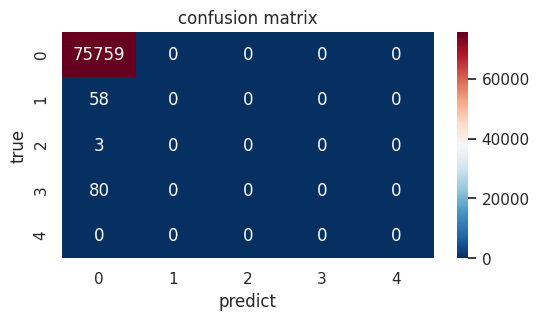

In [106]:
import seaborn as sns

sns.set()
f,ax=plt.subplots()
sns.heatmap(c,annot=True,fmt='d',cmap='RdBu_r')

ax.set_title('confusion matrix')
ax.set_xlabel('predict')
ax.set_ylabel('true')

In [107]:
# Your Code to display the classification results as required.
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     75759
           1       0.00      0.00      0.00        58
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        80

    accuracy                           1.00     75900
   macro avg       0.25      0.25      0.25     75900
weighted avg       1.00      1.00      1.00     75900



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3.3 K-fold Cross-Validation
You are required to use K-fold cross validation to find out the best hyper-parameter set, where K = 2.
<div class="alert alert-block alert-info">

**Code**: 
Implement 2-fold cross validation for three (any three) classification models, where K = 2.
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1.  Your code design and running results, <br>
		2.  Your findings on hyper-parameters based on this cross-validation  results (Best results).
</div>

In [108]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# K = 2
# Your code for 2-fold cross validation

In [113]:
# decision tree 
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train)
predictions = dtModel.transform(test)
predictions.select('features', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+--------------------+-----+--------------------+----------+--------------------+
|            features|label|       rawPrediction|prediction|         probability|
+--------------------+-----+--------------------+----------+--------------------+
|[4.0,2076.0,1734....|    0|[176710.0,136.0,1...|       0.0|[0.99799508655013...|
|[4.0,2082.0,908.0...|    0|[176710.0,136.0,1...|       0.0|[0.99799508655013...|
|[7.0,1108.0,199.0...|    0|[176710.0,136.0,1...|       0.0|[0.99799508655013...|
|[7.0,1109.0,199.0...|    0|[176710.0,136.0,1...|       0.0|[0.99799508655013...|
|[7.0,2034.0,4251....|    0|[176710.0,136.0,1...|       0.0|[0.99799508655013...|
|[7.0,2075.0,4251....|    0|[176710.0,136.0,1...|       0.0|[0.99799508655013...|
|[7.0,2099.0,4251....|    0|[176710.0,136.0,1...|       0.0|[0.99799508655013...|
|[15.0,2502.0,567....|    0|[176710.0,136.0,1...|       0.0|[0.99799508655013...|
|[17.0,1845.0,1734...|    0|[176710.0,136.0,1...|       0.0|[0.99799508655013...|
|[17.0,2080.0,17

In [114]:
# cross validation
paramGrid = ParamGridBuilder() \
    .addGrid(dt.maxDepth, [3, 4, 5]) \
    .build()

crossval = CrossValidator(estimator=dt,
                          estimatorParamMaps=paramGrid,
                          evaluator=MulticlassClassificationEvaluator(),
                          numFolds=2)  # use 3+ folds in practice

# Run cross-validation, and choose the best set of parameters.
cvModel = crossval.fit(train)
# predict_test = cvModel.transform(testData)
pred_test = cvModel.transform(test)

# Make predictions on test documents. cvModel uses the best model found (lrModel).
#prediction = cvModel.transform(test)
# selected = prediction.select("features", "label", "probability", "prediction")

pred_test_pd = pd.DataFrame(pred_test.select('label','prediction').collect(),columns = ['label','prediction'])
print(classification_report(pred_test_pd.label,pred_test_pd.prediction))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     75759
           1       0.62      0.48      0.54        58
           2       0.00      0.00      0.00         3
           3       1.00      0.09      0.16        80

    accuracy                           1.00     75900
   macro avg       0.66      0.39      0.43     75900
weighted avg       1.00      1.00      1.00     75900



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [115]:
evaluator = MulticlassClassificationEvaluator()
print("Test Area Under ROC: "+ str(evaluator.evaluate(predictions)))


Test Area Under ROC: 0.9974299441969399


In [116]:
# randomforest 
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train)
predictions = rfModel.transform(test)
predictions.select('features', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+--------------------+-----+--------------------+----------+--------------------+
|            features|label|       rawPrediction|prediction|         probability|
+--------------------+-----+--------------------+----------+--------------------+
|[4.0,2076.0,1734....|    0|[19.9811309424292...|       0.0|[0.99905654712146...|
|[4.0,2082.0,908.0...|    0|[19.9802657059359...|       0.0|[0.99901328529679...|
|[7.0,1108.0,199.0...|    0|[19.8469261130378...|       0.0|[0.99234630565189...|
|[7.0,1109.0,199.0...|    0|[19.8469261130378...|       0.0|[0.99234630565189...|
|[7.0,2034.0,4251....|    0|[19.9811309424292...|       0.0|[0.99905654712146...|
|[7.0,2075.0,4251....|    0|[19.9811309424292...|       0.0|[0.99905654712146...|
|[7.0,2099.0,4251....|    0|[19.9811309424292...|       0.0|[0.99905654712146...|
|[15.0,2502.0,567....|    0|[19.9801269647054...|       0.0|[0.99900634823527...|
|[17.0,1845.0,1734...|    0|[19.9790335986251...|       0.0|[0.99895167993125...|
|[17.0,2080.0,17

In [117]:
# cross validation
paramGrid = ParamGridBuilder() \
    .addGrid(dt.maxDepth, [3, 4, 5]) \
    .build()

crossval = CrossValidator(estimator=rf,
                          estimatorParamMaps=paramGrid,
                          evaluator=MulticlassClassificationEvaluator(),
                          numFolds=2)  # use 3+ folds in practice

# Run cross-validation, and choose the best set of parameters.
cvModel = crossval.fit(train)
# predict_test = cvModel.transform(testData)
pred_test = cvModel.transform(test)

# Make predictions on test documents. cvModel uses the best model found (lrModel).
# selected = prediction.select("features", "label", "probability", "prediction")

pred_test_pd = pd.DataFrame(pred_test.select('label','prediction').collect(),columns = ['label','prediction'])
print(classification_report(pred_test_pd.label,pred_test_pd.prediction))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     75759
           1       0.00      0.00      0.00        58
           2       0.00      0.00      0.00         3
           3       1.00      0.05      0.10        80

    accuracy                           1.00     75900
   macro avg       0.50      0.26      0.27     75900
weighted avg       1.00      1.00      1.00     75900



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [118]:
evaluator = MulticlassClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions)))

Test Area Under ROC: 0.997340987196354


In [119]:
# Naive Bayes model
from pyspark.ml.classification import NaiveBayes
nb = NaiveBayes(smoothing=1)
nbmodel = nb.fit(train)
predictions= nbmodel.transform(test)

# predictions.filter(predictions['prediction']==0)\
#          .select('label','prediction')\
#          .show(n=5,truncate=30)

predictions.select('label', 'rawPrediction', 'prediction', 'probability').show(10)



+-----+--------------------+----------+--------------------+
|label|       rawPrediction|prediction|         probability|
+-----+--------------------+----------+--------------------+
|    0|[-11143.567797014...|       1.0|[0.0,1.0,0.0,4.24...|
|    0|[-8630.6871853748...|       1.0|[2.83582293042405...|
|    0|[-3686.9364590692...|       3.0|[1.06854908525209...|
|    0|[-3689.7042822253...|       3.0|[8.25940993496554...|
|    0|[-18861.874117710...|       1.0|[0.0,1.0,0.0,0.0,...|
|    0|[-18975.354867109...|       1.0|[0.0,1.0,0.0,0.0,...|
|    0|[-19041.782622855...|       1.0|[0.0,1.0,0.0,0.0,...|
|    0|[-8691.5977204741...|       3.0|[2.01054107820236...|
|    0|[-10505.676482782...|       1.0|[0.0,1.0,0.0,1.42...|
|    0|[-11156.114924459...|       1.0|[0.0,1.0,0.0,1.15...|
+-----+--------------------+----------+--------------------+
only showing top 10 rows



In [120]:
# cross validation
paramGrid = ParamGridBuilder() \
    .addGrid(dt.maxDepth, [3, 4, 5]) \
    .build()

crossval = CrossValidator(estimator=nb,
                          estimatorParamMaps=paramGrid,
                          evaluator=MulticlassClassificationEvaluator(),
                          numFolds=2)  # use 3+ folds in practice

# Run cross-validation, and choose the best set of parameters.
cvModel = crossval.fit(train)
# predict_test = cvModel.transform(testData)
pred_test = cvModel.transform(test)

# Make predictions on test documents. cvModel uses the best model found (lrModel).
# selected = prediction.select("features", "label", "probability", "prediction")

pred_test_pd = pd.DataFrame(pred_test.select('label','prediction').collect(),columns = ['label','prediction'])
print(classification_report(pred_test_pd.label,pred_test_pd.prediction))


              precision    recall  f1-score   support

         0.0       1.00      0.46      0.63     75759
         1.0       0.00      0.52      0.00        58
         2.0       0.00      1.00      0.01         3
         3.0       0.00      0.36      0.00        80
         4.0       0.00      0.00      0.00         0

    accuracy                           0.46     75900
   macro avg       0.20      0.47      0.13     75900
weighted avg       1.00      0.46      0.63     75900



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [121]:
evaluator = MulticlassClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions)))

Test Area Under ROC: 0.6274707063949032


In [122]:
#Kfold cross validator numFolds
evaluator = MulticlassClassificationEvaluator()
crossval= CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=2)
cvModel = crossval.fit(df_lr)
cvModel.avgMetrics

[0.9969596476574991, 0.9969596476574991, 0.9969596476574991]

## 4.Association Rule Mining
<div class="alert alert-block alert-info">

**Code**: 
Implement association rule mining with a suitable threshold for support, and confidence 
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1.  Your code design and running results, <br>
		2.  Your findings on on ARMing results.
</div>

In [47]:
!pip install apyori
!pip install apriori
from apyori import apriori

  Created wheel for apyori: filename=apyori-1.1.2-cp37-none-any.whl size=5975 sha256=d42879a2489f352c039782981499fa2a915393339963c9a6f271619a75f07326
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori
  Created wheel for apriori: filename=apriori-1.0.0-cp37-none-any.whl size=2478 sha256=aa1de2d89cba87fe177ac80b423e6ce95838ca9e02184226926f5f403534d032
  Stored in directory: /root/.cache/pip/wheels/20/c3/82/6e5f443b9a41b1e9ad991017fb64814bc75b4654409a073ea3
Successfully built apriori


In [48]:
df_ht2 = pd.concat(data)


In [49]:
df_ht2 = df_ht2.replace(['None','-','NaN'],np.nan)
df_ht2 = df_ht2[['cs(Referer)','sc_status', 'c_ip','cs(User_Agent)']]
df_ht2 = df_ht2.dropna(axis = 0)

In [50]:
df_ht2['sc_status'].value_counts() #Check how many sc_status 404 to determine if there is enough for mining

200.0    5239050
304.0    1845447
404.0      30663
302.0       7236
206.0       5757
500.0        565
301.0        282
400.0        192
403.0         23
416.0          3
Name: sc_status, dtype: int64

In [51]:
df_ht2 = df_ht2[df_ht2.sc_status == 404.0] #filter sc_status 404

In [52]:
df_ht2 = df_ht2.sample(frac = 0.4, random_state=1) #Select sample data set
df_ht2.shape

(12265, 4)

In [53]:
X = len(df_ht2)

In [54]:
#Add to list of lists
weblogs= []
for i in range(0, X):
    weblogs.append([str(df_ht2.values[i,j]) for j in range(0, 4)])
print(weblogs)

[['http://hotelTulip.com.hk/english/special.htm', '404.0', '210.245.159.149', 'Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+5.1;+SV1;+.NET+CLR+1.1.4322;+InfoPath.1)'], ['http://www.hotelTulip.com.hk/Tulip/dining/dining_tablebooking.aspx?lang=zh-hk', '404.0', '203.223.226.247', 'Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+5.1;+SV1;+.NET+CLR+1.0.3705)'], ['http://hotelTulip.com.hk/english/special.htm', '404.0', '64.215.148.98', 'Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+5.1)'], ['http://hotelTulip.com.hk/english/special.htm', '404.0', '24.83.233.91', 'Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+5.1;+SV1;+.NET+CLR+1.1.4322)'], ['http://hotelTulip.com.hk/english/special.htm', '404.0', '210.0.221.218', 'Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+5.1;+SV1)'], ['http://www.hotelTulip.com.hk/Tulip/contactus/contactus_index.aspx?lang=en-us', '404.0', '203.198.138.94', 'Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+5.1;+SV1;+.NET+CLR+1.1.4322)'], ['http://hotelTulip.com.hk/english/sp

In [55]:
rules = apriori(weblogs, min_support = 0.005, min_confidence = 0.4, min_lift = 2, min_length = 2)

In [56]:
# Visualising the results
results = list(rules)

myResults = [list(x) for x in results] 

In [57]:
print(myResults)

[[frozenset({'Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+5.1)', '210.184.71.81'}), 0.005951895637994292, [OrderedStatistic(items_base=frozenset({'210.184.71.81'}), items_add=frozenset({'Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+5.1)'}), confidence=0.6347826086956521, lift=9.346469022391563)]], [frozenset({'http://www.hotelTulip.com.hk/Tulip/home/en-us/home_index.aspx', '59.188.33.66'}), 0.0264166326946596, [OrderedStatistic(items_base=frozenset({'59.188.33.66'}), items_add=frozenset({'http://www.hotelTulip.com.hk/Tulip/home/en-us/home_index.aspx'}), confidence=0.6849894291754756, lift=24.782877135213003), OrderedStatistic(items_base=frozenset({'http://www.hotelTulip.com.hk/Tulip/home/en-us/home_index.aspx'}), items_add=frozenset({'59.188.33.66'}), confidence=0.9557522123893805, lift=24.782877135213003)]], [frozenset({'http://hotelTulip.com.hk/english/special.htm', 'Mozilla/5.0+(Windows;+U;+Windows+NT+5.1;+en-US;+rv:1.8.1.1)+Gecko/20061204+Firefox/2.0.0.1'}), 0.005707297187117815

In [58]:
print(len(results))

8


In [59]:
for item in results:

   #create list and match items into pairs
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

  
    print("Support: " + str(item[1]))

   

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+5.1) -> 210.184.71.81
Support: 0.005951895637994292
Confidence: 0.6347826086956521
Lift: 9.346469022391563
Rule: http://www.hotelTulip.com.hk/Tulip/home/en-us/home_index.aspx -> 59.188.33.66
Support: 0.0264166326946596
Confidence: 0.6849894291754756
Lift: 24.782877135213003
Rule: http://hotelTulip.com.hk/english/special.htm -> Mozilla/5.0+(Windows;+U;+Windows+NT+5.1;+en-US;+rv:1.8.1.1)+Gecko/20061204+Firefox/2.0.0.1
Support: 0.005707297187117815
Confidence: 0.9589041095890412
Lift: 2.259984416623672
Rule: 404.0 -> Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+5.1)
Support: 0.005951895637994292
Confidence: 0.6347826086956521
Lift: 9.346469022391563
Rule: http://www.hotelTulip.com.hk/Tulip/home/en-us/home_index.aspx -> 404.0
Support: 0.0264166326946596
Confidence: 0.6849894291754756
Lift: 24.782877135213003
Rule: http://hotelTulip.com.hk/english/special.htm -> 404.0
Support: 0.005707297187117815
Confidence: 0.9589041095890412
Lift: 2.25

# Part II - Web Crawling

## Overview
In 2021, 
to better introduce and understand the research works on the professors,
Deakin university wants to perform the citation prediction on individual professor level.
You are required to implement a web crawler to crawl the *citation* information 
for A/Professor Gang Li from 2003 to 2021 (start at 2003 and end at 2021),
and also conduct several prediction coding tasks. 
You will need to make sure that 
the web crawling code and prediction code meets the requirements.
You are free to use any **Python** package for Web crawling and prediction 
by finishing below tasks.  


## 5.Crawl Gang Li citation information from 2003 to 2021

 <div class="alert alert-block alert-info">

**Code**: 
    You are required to write the code to generate the csv for Gang Li's citation from 2003 to 2021
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [60]:
# write your import and necessary web crawling libary here
!pip install beautifulsoup4
!pip install requests

In [62]:
from bs4 import BeautifulSoup, SoupStrainer
import requests

url = "https://scholar.google.com/citations?hl=en&user=dqwjm-0AAAAJ#d=gsc_md_hist"
page = requests.get(url)
data = page.text
soup = BeautifulSoup(data, 'html.parser')
years = [item.text for item in soup.find_all('span', {'class':'gsc_g_t'})]
citation_number = [item.text for item in soup.find_all('span', {'class':'gsc_g_al'})]
#create dataframe
df=pd.DataFrame()
df['Years']= years
df['Citation']= citation_number
df.to_csv('/content/drive/MyDrive/Citation2003-2021.csv', index=False)

## 6.Train Arima to predict the 2018 to 2020 citation

### 6.1 Train Arima Model
 <div class="alert alert-block alert-info">

**Code**: 
    You will need to use the create_df and then perform the
Arima training with parameter of $p=1$, $q=1$ and $d=1$ on data from 2003 to 2017 (15 years)
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [63]:
!pip install "statsmodels==0.11.1"

     |████████████████████████████████| 8.7MB 5.3MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [64]:
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from pandas.plotting import autocorrelation_plot

In [65]:
series =pd.read_csv('/content/drive/MyDrive/Citation2003-2021.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(series.head())

Years
2003-01-01    15
2004-01-01    34
2005-01-01    17
2006-01-01    11
2007-01-01    33
Name: Citation, dtype: int64


In [66]:
# split 2003 to 2020 into train and test sets
X = series.values
X = X.astype('float32')
train, test = X[0:-4], X[-4:-1]

In [67]:
# fit an ARIMA model
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())
# forecast
result = model_fit.get_forecast()
# summarize forecast and confidence intervals
print('Expected: %.3f' % result.predicted_mean)
print('Forecast: %.3f' % test[0])
print('Standard Error: %.3f' % result.se_mean)
ci = result.conf_int(0.05)
print('95%% Interval: %.3f to %.3f' % (ci[0,0], ci[0,1]))

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   15
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -62.283
Date:                Sat, 22 May 2021   AIC                            130.565
Time:                        01:20:04   BIC                            132.482
Sample:                             0   HQIC                           130.388
                                 - 15                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9486      0.240      3.950      0.000       0.478       1.419
ma.L1         -0.4599      0.652     -0.705      0.481      -1.738       0.818
sigma2       387.7366    165.805      2.339      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


### 6.2 Predicting the citation and Calculate the RMSE
 <div class="alert alert-block alert-info">

**Code**: 
    you will need to use the trained Arime model to predict the citation on year 2018, 2019 and 2020.
You will need to perform the evaluation by comparing the predicted citation from 2018 to 2020 with 
the true citation from 2018 to 2020 and calculate the RMSE (root mean square error).
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [68]:
# your code to predict the citation and save it to variable preds. You may need to output the confidence interval(95%) here as well
history = [x for x in train]
predictions = list()
best_parameter = [1,1,1]
confidence_interval = []

# start=len(train)
# end=len(test)
# test_index=series.index[-4:-1]

for t in range(len(test)):
    model = ARIMA(history, order=(best_parameter[0],best_parameter[1],best_parameter[2]))
    model_fit = model.fit()
    output = model_fit.get_forecast()
    yhat = output.predicted_mean
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    ci = output.conf_int(0.05)
    confidence_interval.append(ci[0])
    print('95%% Interval: %.3f to %.3f' % (ci[0,0], ci[0,1]))

    

predicted=429.164660, expected=450.000000
95% Interval: 390.571 to 467.758
predicted=502.372082, expected=579.000000
95% Interval: 464.082 to 540.663
predicted=677.221026, expected=838.000000
95% Interval: 625.240 to 729.202


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


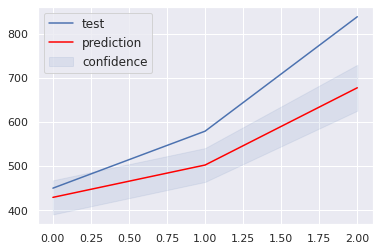

In [69]:
# plot forecasts against actual outcomes and also the confidence int at 95%
plt.plot(test,label='test')
plt.plot(predictions, color='red',label='prediction')
plt.fill_between(list(range(len(test))),
                 np.array(confidence_interval)[:,0], np.array(confidence_interval)[:,1],
                alpha=0.1, color='b',label='confidence')
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [70]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# evaluate forecasts
# Your code to show the performance RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 103.531


### 6.3 Draw the visualization to compare

 <div class="alert alert-block alert-info">

**Code**: 
   You will also need to use matplotlib to draw the line plot with training data from 2013 to 2017,
the testing truth, the prediction and also the confidence interval (95%). 
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [72]:
#create plot index
plot_index=series.index[:-1]
test_index=series.index[-4:-1]
train1=series[:-3]
test1=series[-5:-1]
predictions1=np.concatenate(predictions, axis=0 )
lower_series = pd.Series(np.array(confidence_interval)[:, 0], index=test_index)
upper_series = pd.Series(np.array(confidence_interval)[:, 1], index=test_index)

In [73]:
#combine train and predicrted values 
trainpred=np.concatenate((train.T,predictions1), axis=None)
plot_pred=pd.Series(trainpred, index=plot_index)

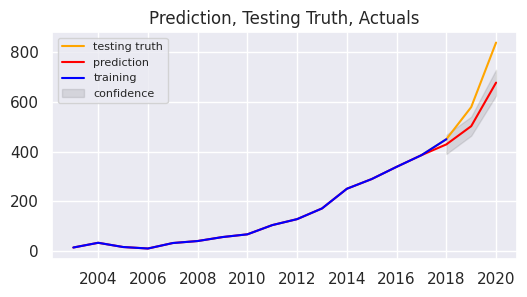

In [74]:
# plt.plot(test1, c='orange',label='test')
plt.plot(test1, c='orange',label='testing truth')
plt.plot(plot_pred, c='red', label='prediction')
plt.plot(train1, c='blue', label='training')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.1,label='confidence')
plt.title('Prediction, Testing Truth, Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## 7.Conduct the Grid Search with paramter selection and then predict the 2021 and 2022

### 7.1 Grid Search
 <div class="alert alert-block alert-info">

**Code**: 
  You will need to run the grid search for parameter $p=[1,2]$, 
$q=[1,2]$,
$d=[1,2]$
with training data on year 2003 to 2017 and testing data on 2018 to 2020
The result of the search on each paratemer combination (eg: p=1,q=1,d=1)
will need to be stored in the "search-results.csv",
The search-results.csv will have the column of "RMSE" and column "PARAMETER".
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [75]:
# split into train and test sets
X = series.values
X = X.astype('float32')
train, test = X[0:-4], X[-4:-1]
history = [x for x in train]
predictions = list()

RMSE = []
PARAMETER=[]
p=[1,2]
q=[1,2]
d=[1,2]

# walk-forward validation
for i1 in p:
  for i2 in q:
    for i3 in d:
      for t in range(len(test)):
	      model = ARIMA(history, order=(i1,i3,i2))
	      model_fit = model.fit()
	      output = model_fit.forecast()
	      yhat = output[0]
	      predictions.append(yhat)
	      obs = test[t]
	      history.append(obs)
	      #print('predicted=%f, expected=%f' % (yhat, obs))  
      rmse = sqrt(mean_squared_error(test, predictions))
      history = [x for x in train]
      predictions = list()  
      RMSE.append(rmse)
      PARAMETER.append([i1,i2,i3])
      print('Test RMSE: %.3f' % rmse, 'PARAMETER: %.f' %  i1,i2,i3)  
   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Test RMSE: 103.531 PARAMETER: 1 1 1
Test RMSE: 83.716 PARAMETER: 1 1 2


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Test RMSE: 102.459 PARAMETER: 1 2 1


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test RMSE: 94.032 PARAMETER: 1 2 2


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test RMSE: 90.114 PARAMETER: 2 1 1
Test RMSE: 100.752 PARAMETER: 2 1 2


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test RMSE: 97.739 PARAMETER: 2 2 1


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test RMSE: 100.281 PARAMETER: 2 2 2


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [79]:
# your code to generate the seach-results.csv and print the top 6 rows
Results = pd.DataFrame({'RMSE':RMSE, 'Parameter':PARAMETER})
Results.to_csv('/content/drive/MyDrive/Search-Results.csv', index=False)
Results.head(6)

,RMSE,Parameter
0,103.530717,"[1, 1, 1]"
1,83.716372,"[1, 1, 2]"
2,102.458962,"[1, 2, 1]"
3,94.031595,"[1, 2, 2]"
4,90.113732,"[2, 1, 1]"
5,100.752447,"[2, 1, 2]"


### 7.2 TRAIN With Best Parameter Set with data up to 2020 and Predict the 2021 and 2022

<div class="alert alert-block alert-info">

**Code**: 
  You will need to perform the training with Arima on data from 2003 to 2020 with best parameter you have found in last task,
and then conduct the prediction for year 2021 and 2022.
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [80]:
#create series including 2021-2022
from dateutil.relativedelta import relativedelta
start = datetime.datetime.strptime("2021", "%Y")
date_list = [start + relativedelta(years=x) for x in range(0,2)]
future_prediction = pd.Series(index=date_list)
series1 = pd.concat([series[:-1], future_prediction])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


In [81]:
# split into train and forecast sets
X = series1.values
X = X.astype('float32')
train= X[:-2]
forecast=X[-2:]

In [82]:
# Your code to predict for 2021 and 2022
history = [x for x in train]
predictions2 = list()
best_parameter = [1,1,2]
confidence_interval = []

for f in range(len(forecast)):
    model = ARIMA(history, order=(best_parameter[0],best_parameter[1],best_parameter[2]))
    model_fit = model.fit()
    output = model_fit.get_forecast()
    yhat = output.predicted_mean
    predictions2.append(yhat)
    obs = forecast[f]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    ci = output.conf_int(0.05)
    confidence_interval.append(ci[0])
    print('95%% Interval: %.3f to %.3f' % (ci[0,0], ci[0,1]))


predicted=1139.794893, expected=nan
95% Interval: 1063.781 to 1215.809
predicted=1435.180129, expected=nan
95% Interval: 1235.953 to 1634.407


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [83]:
#create plot index
plot_index=series1.index
forecast_index=series1.index[-2:]
train2=series1[:-2]
forecast1=series[-2:]
predictions2=np.concatenate(predictions2, axis=0 )
lower_series = pd.Series(np.array(confidence_interval)[:, 0], index=forecast_index)
upper_series = pd.Series(np.array(confidence_interval)[:, 1], index=forecast_index)

In [84]:
#combine train and predicrted values 
trainpred2=np.concatenate((train2.T,predictions2), axis=None)
plot_pred2=pd.Series(trainpred2, index=plot_index)

<div class="alert alert-block alert-info">

**Code**: 
  You will also need to use matplotlib to draw the line plot with training data from 2013 to 2020, the prediction and also the confidence interval (95%).
    <br>
    *Keep the outputs for code in your notebook.
</div>

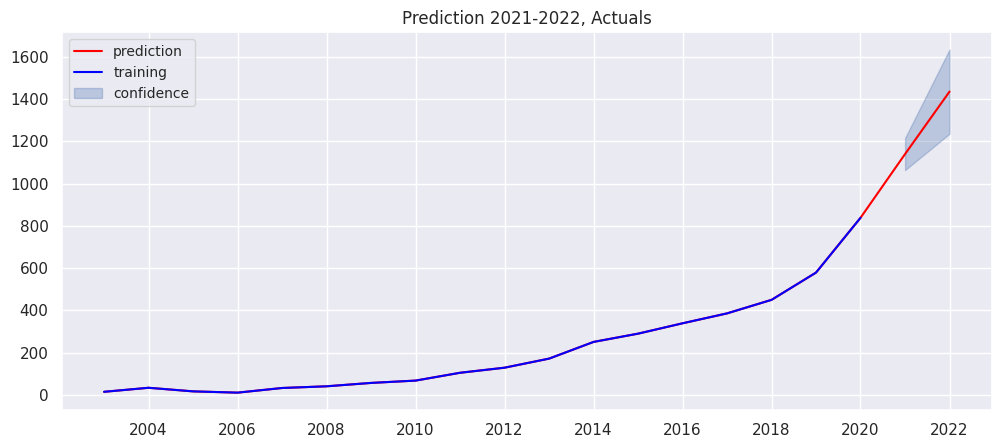

In [85]:
fig, ax = plt.subplots(figsize=(12, 5))
plt.plot(plot_pred2, c='red', label='prediction')
plt.plot(train2, c='blue', label='training')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='b', alpha=.3,label='confidence')
plt.title('Prediction 2021-2022, Actuals')
plt.legend(loc='upper left', fontsize=10)
plt.show()

# Part III - Self-Reflective Essay

## Overview

Please check the assessment task specification details.
